In [1]:
import pandas as pd
import numpy as np
import click
from matplotlib import pyplot as plt
import posture_detector as pst
from posture_detector.utils.constants import columns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.dummy import DummyClassifier

In [2]:

df = pd.read_csv(
    '../data/raw/datalog_at_2021-02-16_21_36_03.261724',
    sep=';'
)
df = pst.data.parse_dataset(df)
df.head()


,Ax,Ay,Az,T,Gx,Gy,Gz,FlS,Label
0,0.39,0.92,-0.01,34.18,-2.21,-6.95,-1.24,581,nan
1,0.34,0.94,-0.03,34.18,-4.06,1.92,1.96,581,nan
2,0.39,0.91,0.03,34.18,-2.53,-1.82,2.86,583,nan
3,0.38,0.91,-0.01,34.04,-2.89,0.01,4.55,581,nan
4,0.39,0.90,0.01,34.18,-1.86,-1.15,2.69,578,nan


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ax      305 non-null    float64
 1   Ay      305 non-null    float64
 2   Az      305 non-null    float64
 3   T       305 non-null    float64
 4   Gx      305 non-null    float64
 5   Gy      305 non-null    float64
 6   Gz      305 non-null    float64
 7   FlS     305 non-null    int64  
 8   Label   305 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 21.6+ KB


In [4]:
df['Label'].unique()

array(['nan', 't', 'c', 'i', 'y'], dtype=object)

In [5]:
df.head()

,Ax,Ay,Az,T,Gx,Gy,Gz,FlS,Label
0,0.39,0.92,-0.01,34.18,-2.21,-6.95,-1.24,581,nan
1,0.34,0.94,-0.03,34.18,-4.06,1.92,1.96,581,nan
2,0.39,0.91,0.03,34.18,-2.53,-1.82,2.86,583,nan
3,0.38,0.91,-0.01,34.04,-2.89,0.01,4.55,581,nan
4,0.39,0.90,0.01,34.18,-1.86,-1.15,2.69,578,nan


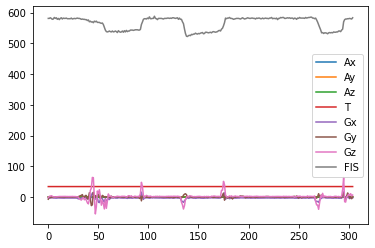

In [6]:
df.plot()
plt.show()

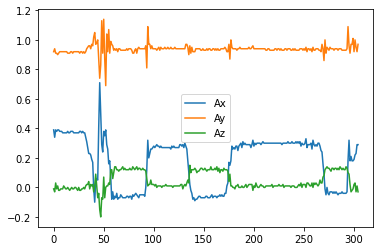

In [7]:
df[['Ax', 'Ay', 'Az']].plot()
plt.show()

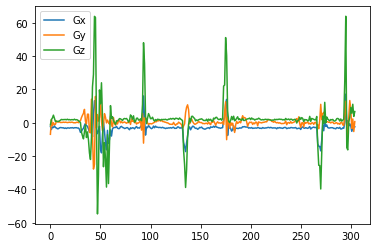

In [8]:
df[['Gx', 'Gy', 'Gz']].plot()
plt.show()

In [9]:
slice_with_labels = ~df['Label'].apply( lambda x: x == 'nan')
slice_with_postures = ~df['Label'].apply( lambda x: x not in ['y', 't'])
data = df[ slice_with_labels & slice_with_postures ]
data['Label'].unique()

array(['t', 'y'], dtype=object)

In [10]:
encoding = LabelEncoder()
data['Label'] = encoding.fit_transform(data['Label'])
data['Label'].unique()

/home/gabriel/dev/recommenders/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1])

In [11]:
X = data.drop('Label', axis=1)
y = data['Label']

In [12]:
model = RidgeClassifier().fit(X, y)

In [13]:
model.score(X, y)

0.9038461538461539

In [14]:
RidgeClassifier().fit(X.drop('FlS', axis=1), y).score(X.drop('FlS', axis=1), y)

0.9038461538461539

In [15]:
RidgeClassifier()\
    .fit(X['FlS'].values.reshape(-1, 1), y)\
    .score(X['FlS'].values.reshape(-1, 1), y)


0.9038461538461539

In [16]:

RidgeClassifier()\
    .fit(X['Ay'].values.reshape(-1, 1), y)\
    .score(X['Ay'].values.reshape(-1, 1), y)


0.9038461538461539

In [17]:
DummyClassifier().fit(X, y).score(X, y)

/home/gabriel/dev/recommenders/venv/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.8557692307692307